# # Problem 1

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10) 

In [3]:
# generating some datas
x = np.linspace(1, 3.05, num = 10)
x

array([1.        , 1.22777778, 1.45555556, 1.68333333, 1.91111111,
       2.13888889, 2.36666667, 2.59444444, 2.82222222, 3.05      ])

In [4]:
d = stats.norm.cdf(x)
d

array([0.84134475, 0.8902348 , 0.92724224, 0.95384471, 0.97200485,
       0.98377767, 0.99102545, 0.9952628 , 0.99761539, 0.99885579])

In [5]:
stats.norm.ppf(d)

array([1.        , 1.22777778, 1.45555556, 1.68333333, 1.91111111,
       2.13888889, 2.36666667, 2.59444444, 2.82222222, 3.05      ])

# It matches the z-values table and the ppf command returns the right answer(x)

# # Problem 2
# Exponential distribution

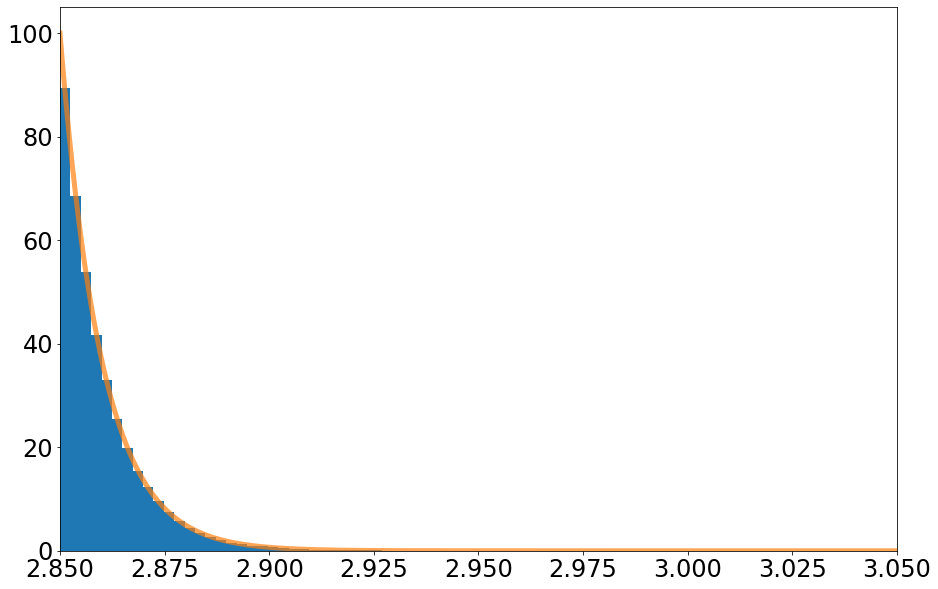

In [6]:
d = stats.expon.rvs(loc = 2.85, scale = 0.01, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density = True)
plt.tick_params(labelsize = 24)
plt.xlim([2.85, 3.05])
x = np.linspace(2.85, 3.05, 100000)
ax.plot(x, stats.expon.pdf(x, loc = 2.85, scale = 0.01), linewidth = 5, alpha = 0.7)
plt.show()

# # Problem 3
# set the hypothetical measurment n to 2.88
# what is the possibility and the sigma when data fall into the measure less than 2.88?

In [7]:
n = 2.88
p = stats.expon.cdf(n, loc = 2.85, scale = 0.01)
p

0.950212931632135

In [8]:
# sigma = (x-mean)/sd
value = stats.expon.ppf(p, loc = 2.85, scale = 0.01)

sigma = (value - np.mean(d))/0.01
sigma

2.0008728132554054

In [9]:
np.mean(d)

2.859991271867446

# # Problem 4
# with different value

In [10]:
n2 = 2.852
p2 = stats.expon.cdf(n2, loc = 2.85, scale = 0.01)
p2

0.18126924692200014

In [11]:
value2 = stats.expon.ppf(p2, loc = 2.85, scale = 0.01)

sigma2 = (value2 - np.mean(d))/0.01
sigma2

-0.799127186744597

# With Lognormal distribution using same n = 2.88

In [12]:
p3 = stats.lognorm.cdf(n, 0.8, loc = 2.85, scale = 0.01)
p3

0.9151650665128939

In [13]:
value3 = stats.lognorm.ppf(p3, 0.8, loc = 2.85, scale = 0.01)
sigma3 = (value3 - np.mean(d))/0.01
sigma3

2.0008728132554054

Which matches the results from problem 3

# __________________________________________________________________________________________
# # Non-continuous distributions
# Binomial Distribution

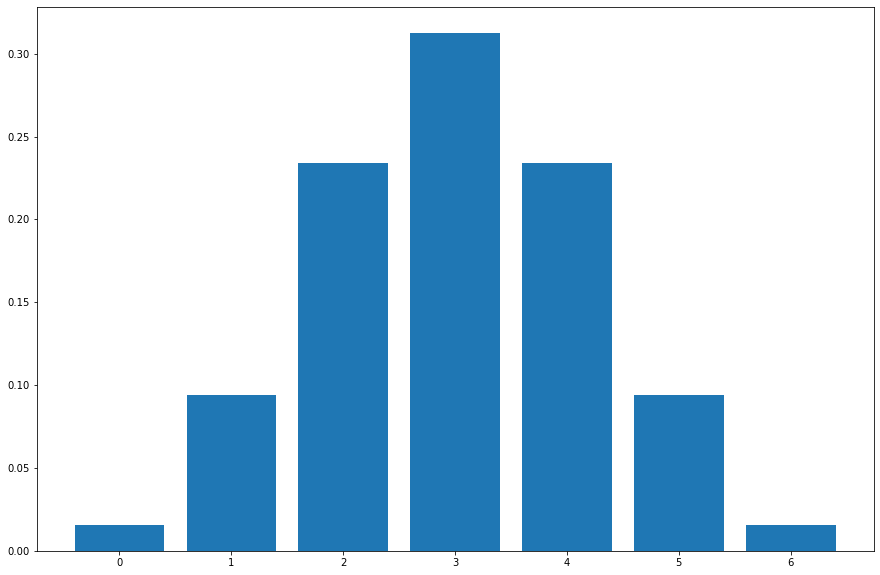

In [33]:
from scipy.stats import binom
# Plot 1
n = 6
p = 0.5
values = np.linspace(0, n, n+1)
dist = [binom.pmf(r, n, p) for r in values]
plt.bar(values, dist)
plt.show()

In [34]:
# Check accuracy of cdf and ppf
prob = binom.cdf(r, n, p)
np.allclose(r, binom.ppf(prob, n, p))

False

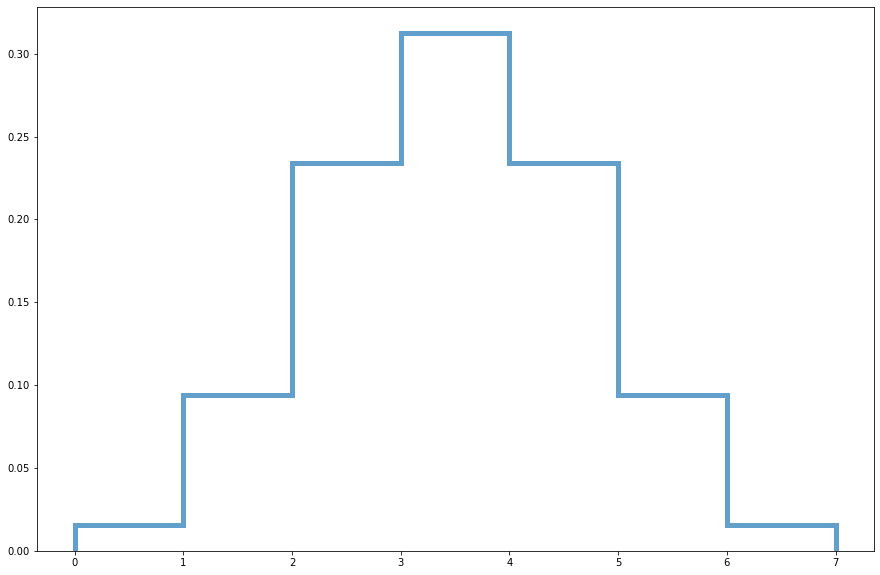

In [35]:
plt.stairs(dist, linewidth = 5, alpha = 0.7)
plt.show()

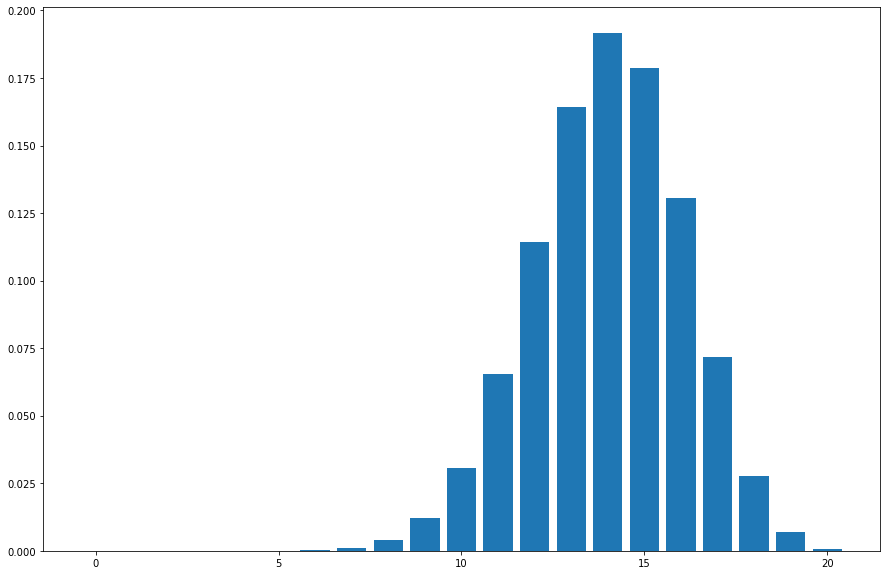

In [36]:
# Plot 2
n = 20
p = 0.7
values = np.linspace(0, n, n+1)
dist = [binom.pmf(r, n, p) for r in values]
plt.bar(values, dist)
plt.show()

In [37]:
# Check accuracy of cdf and ppf
prob = binom.cdf(r, n, p)
np.allclose(r, binom.ppf(prob, n, p))

True

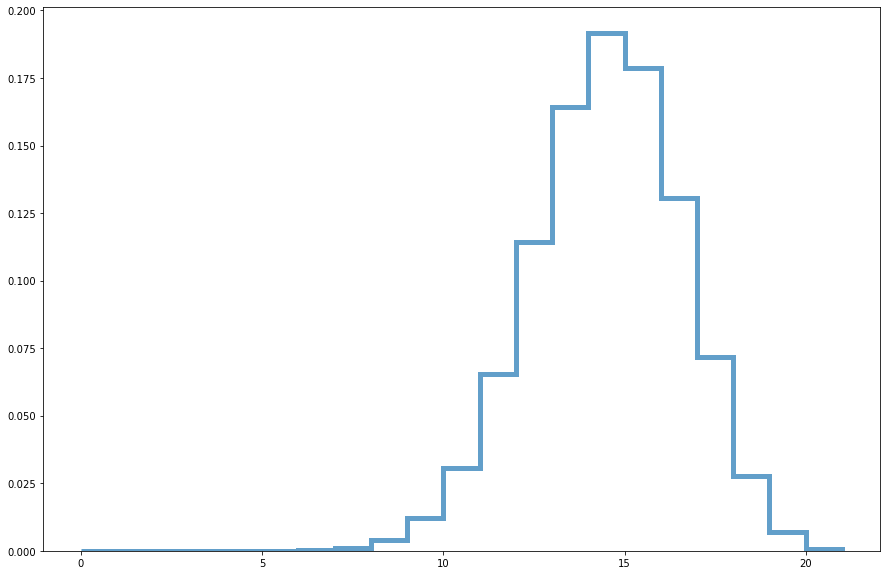

In [38]:
plt.stairs(dist, linewidth = 5, alpha = 0.7)
plt.show()

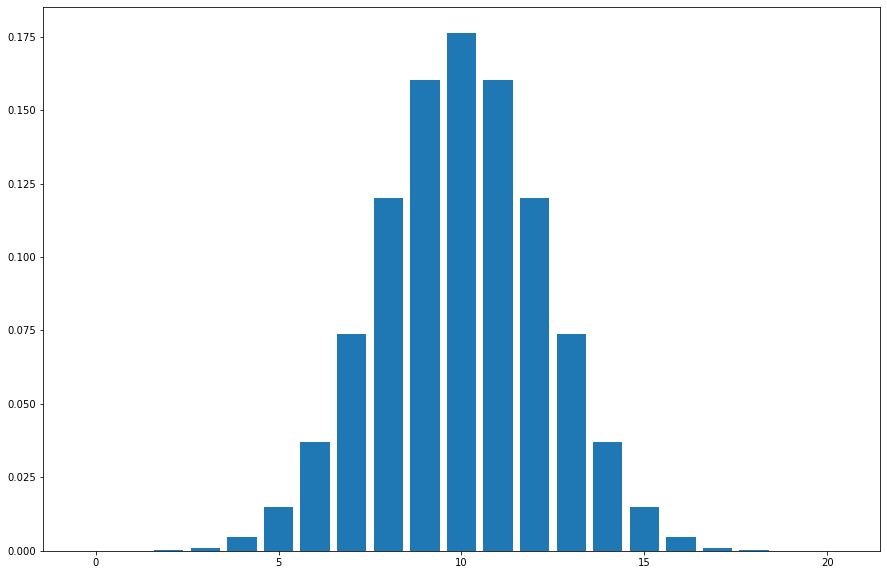

In [39]:
# Plot 3
n = 20
p = 0.5
values = np.linspace(0, n, n+1)
dist = [binom.pmf(r, n, p) for r in values]
plt.bar(values, dist)
plt.show()

In [40]:
# Check accuracy of cdf and ppf
prob = binom.cdf(r, n, p)
np.allclose(r, binom.ppf(prob, n, p))

True

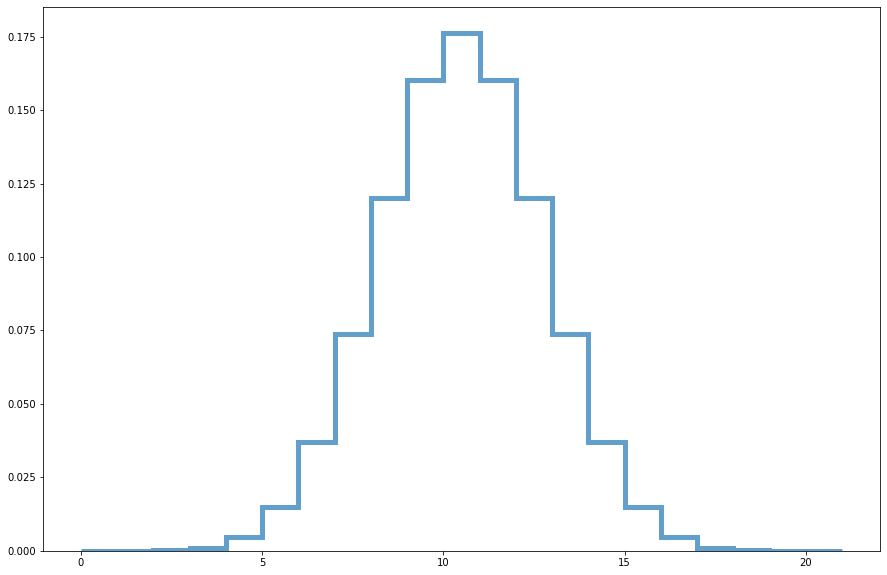

In [41]:
plt.stairs(dist, linewidth = 5, alpha = 0.7)
plt.show()

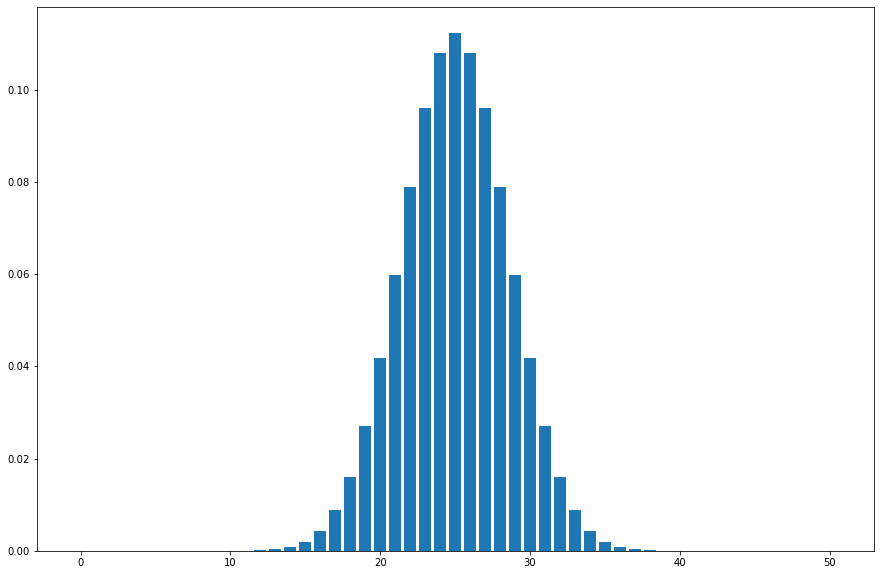

In [42]:
# Plot 4
n = 50
p = 0.5
values = np.linspace(0, n, n+1)
dist = [binom.pmf(r, n, p) for r in values]
plt.bar(values, dist)
plt.show()

In [43]:
# Check accuracy of cdf and ppf
prob = binom.cdf(r, n, p)
np.allclose(r, binom.ppf(prob, n, p))

True

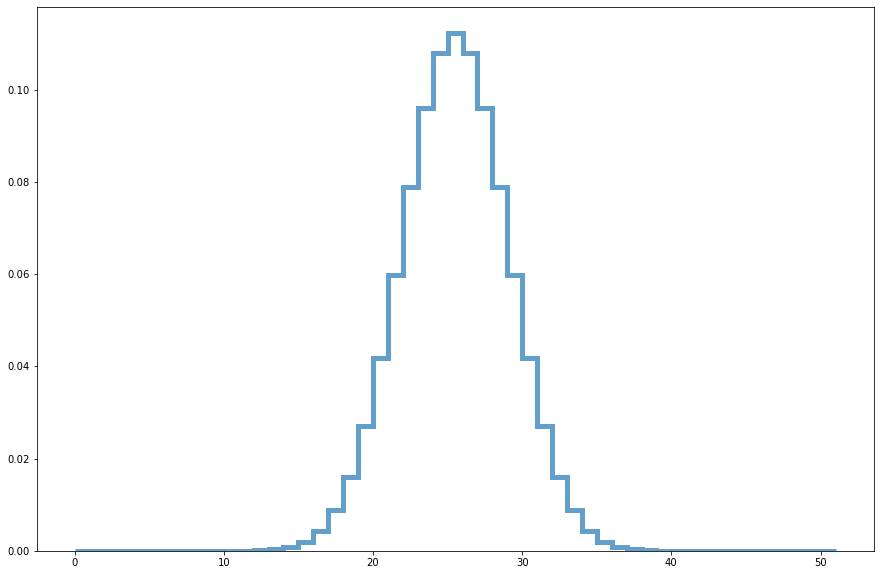

In [44]:
plt.stairs(dist, linewidth = 5, alpha = 0.7)
plt.show()

# - binomal takes n and p as shape parameters, where p is the probability of a single success.
# - if n is 6 and p is 0.05 (Plot 1), it will end up with a normal distribution like graph.

# __________________________________________________________________________________________
# If I flip a coin 20 times. What is the probability that the coin lands on heads 13 times or fewer?

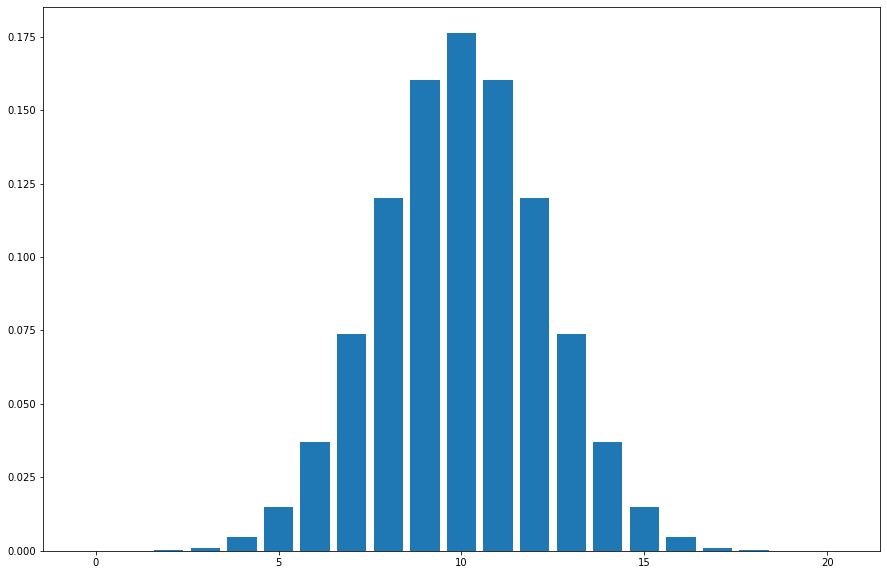

In [45]:
n = 20
p = 0.5
values = np.linspace(0, n, n+1)
dist = [binom.pmf(r, n, p) for r in values]
plt.bar(values, dist)
plt.show()

In [46]:
prob = binom.cdf(13, n, p)
prob

0.9423408508300781

In [47]:
mean = binom.mean(n, p)
mean

10.0

In [48]:
sd = binom.std(n, p)
sd

2.23606797749979

In [49]:
# sigma = (x-mean)/sd
sigma = (binom.ppf(prob, n, p) - mean) / sd
sigma

# it should be a discrete sigma.

1.3416407864998738

# The probabolity is about 0.94.

# The discrete distribution because the data is limited or fininte.
# All the data points have the max possibility of 1. 
# For discrete sigma, it will varies more than continuous distribution.